<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [111]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

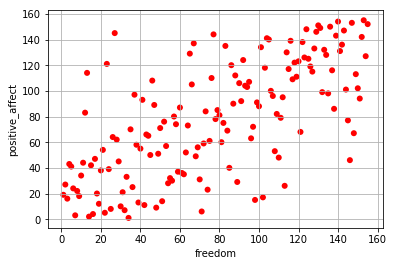

In [4]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
#ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')
ax.scatter(freedom, positive_affect, c='red',  edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.show()

In [5]:
print("Обнаружены выбросы в виде пустых значений",freedom.isnull().sum())

Обнаружены выбросы в виде пустых значений 1


In [6]:
len(freedom)

156

Удаляем выброс в виде пустого значения

In [7]:
freedom2=freedom[freedom.notnull()]

In [8]:
freedom2.isnull().sum()

0

In [9]:
len(freedom2)

155

In [10]:
freedom2.head()

0     5.0
1     6.0
2     3.0
3     7.0
4    19.0
Name: Freedom, dtype: float64

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Показатели посчитаю для новой выборки с удаленным пустым значением

In [11]:
import statistics
print('Медиана: ', statistics.median(freedom2))
print('Среднее=матожидание: ', sum(freedom2)/len(freedom2))
print('Станд откл: ', statistics.pstdev(freedom2))
print('Дисперсия: ', statistics.pvariance(freedom2))
print('Минимум: ', min(freedom2))
print('Максимум: ', max(freedom2))
print('Размах для Freedom: ', max(freedom2)-min(freedom2))

print('Выброс в виде пустого значения обнаружен и удален ранее')

Медиана:  78.0
Среднее=матожидание:  78.0
Станд откл:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах для Freedom:  154.0
Выброс в виде пустого значения обнаружен и удален ранее


Почему нельзя найти моду?

Моду нельзя посчитать, т.к. все элементы встречаются одинаковое кол раз. Как я понимаю 1 раз.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

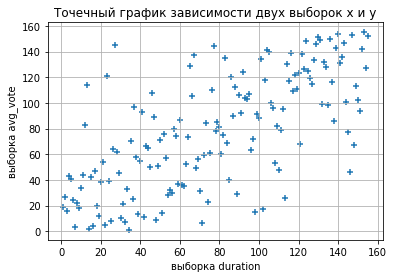

In [12]:
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='+')

Коэффициент корреляции Пирсона: 0.6817698430601656


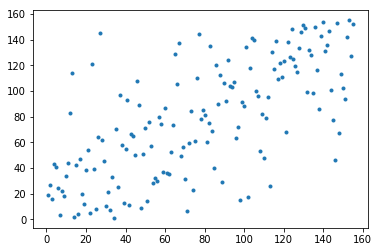

In [13]:
from scipy.stats import pearsonr

x = freedom2
y = positive_affect[positive_affect.notnull()]
#перед удалением пустого значения в ряду positive_affect я проверил предположение, 
#что это та же строка что и в случае с freedom
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [14]:
#центрируем
freedom2=freedom2-(sum(freedom2)/len(freedom2))

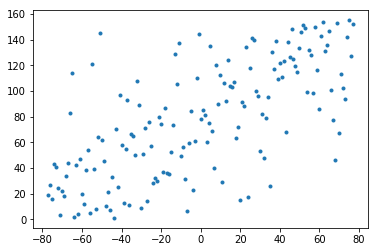

In [15]:
plt.scatter(freedom2, y, marker='.')

[-1.]
[1.]


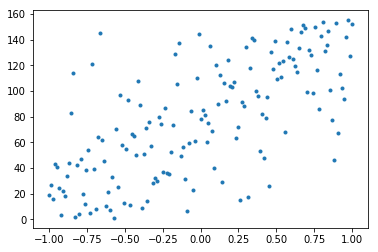

In [16]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom2_2 = min_max_scaler.fit_transform(np.array(freedom2).reshape(-1, 1))
print(min(freedom2_2))
print(max(freedom2_2))
plt.scatter(freedom2_2, y, marker='.')

Построить матрицу корреляций для всех колонок таблицы

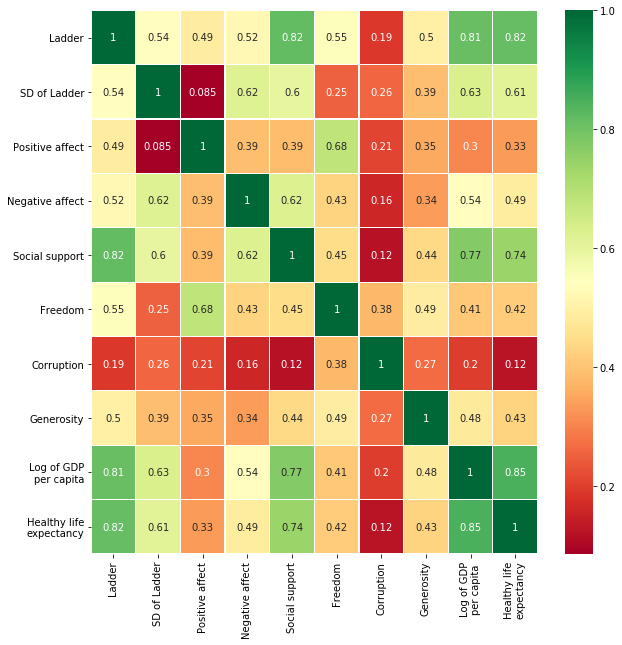

In [17]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

Мера удовл жизнью коррелирует с уровенм соц поддержки - очевидно
                                 с уровнем ВВП и ожидаемой продолж жизни
Понятно, что чем лучше жизнь тем и удовл выше и наоборот )

Загрузить таблицу цен на авокадо: 

In [18]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

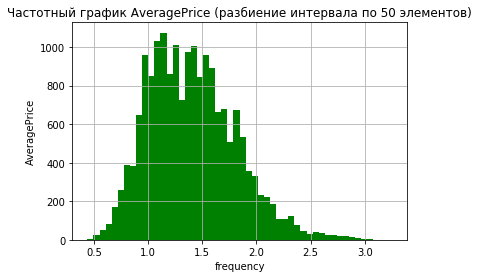

In [19]:
n, bins, patches = plt.hist(df['AveragePrice'], 50, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

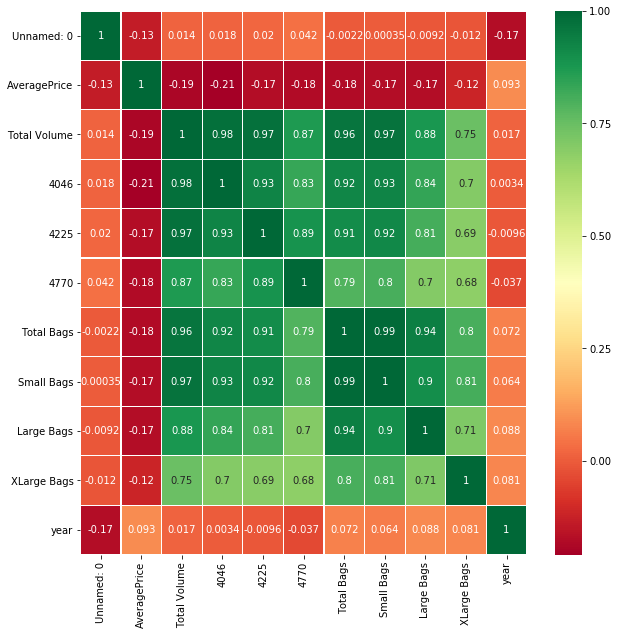

In [20]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [21]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


Между колонками 4046, 4225, 4770 и Average Price отсутствует существенная корреляция. Коэффициент от -0,21 до -0,18. Обратный характер незначительной зависимости показывает что объем продаж указанных сортов незначительно  колеблется обратнопропорционально изменению ср цены.

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [182]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [183]:
df_LV=df[df['region']=='LasVegas']
pd.to_datetime(df_LV['Date'])
df_LV.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1092,0,2015-12-27,0.83,292707.14,135799.94,93317.46,4977.64,58612.10,34675.97,23936.13,0.0,conventional,2015,LasVegas
1093,1,2015-12-20,0.96,232294.71,96355.05,77086.11,4749.61,54103.94,34992.96,19110.98,0.0,conventional,2015,LasVegas
1094,2,2015-12-13,0.95,216119.35,101042.61,68490.51,4942.71,41643.52,33834.13,7809.39,0.0,conventional,2015,LasVegas
1095,3,2015-12-06,0.89,244024.83,94777.64,107758.80,10794.34,30694.05,30201.26,492.79,0.0,conventional,2015,LasVegas
1096,4,2015-11-29,0.95,205476.61,88653.67,81160.21,5227.59,30435.14,29475.24,959.90,0.0,conventional,2015,LasVegas


In [184]:
df_LV=df_LV.iloc[:,1:3]
df_LV=df_LV.sort_values('Date', ascending=True)
df_LV=df_LV.rename(columns={'Date':'ds','AveragePrice':'y'})

df_LV.head()

,ds,y
1143,2015-01-04,0.80
10269,2015-01-04,1.50
1142,2015-01-11,0.93
10268,2015-01-11,1.54
1141,2015-01-18,1.06


In [185]:
fact_period=df_LV[df_LV['ds']<'2017.08.01'].sort_values('ds', ascending=True)

"признаю, что немного запутался с датами. Не понимаю, почему фильтр по дате работает некорректно"

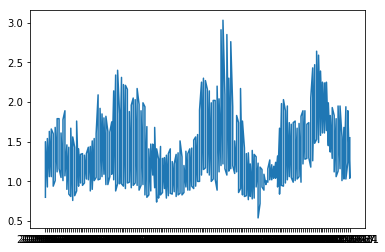

In [186]:
plt.plot(fact_period['ds'], fact_period['y'])

In [187]:
fact_period.sort_values('ds', ascending=True).head()

,ds,y
1143,2015-01-04,0.80
10269,2015-01-04,1.50
1142,2015-01-11,0.93
10268,2015-01-11,1.54
1141,2015-01-18,1.06


In [188]:
from fbprophet import Prophet
m = Prophet()
m.fit(fact_period)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [189]:
future = m.make_future_dataframe(periods=243)
forecast = m.predict(future)

In [190]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.324732,0.590683,1.701926,1.324732,1.324732,-0.194007,-0.194007,-0.194007,-0.194007,-0.194007,-0.194007,0.0,0.0,0.0,1.130724
1,2015-01-04,1.324732,0.614107,1.667105,1.324732,1.324732,-0.194007,-0.194007,-0.194007,-0.194007,-0.194007,-0.194007,0.0,0.0,0.0,1.130724
2,2015-01-11,1.325432,0.584433,1.714164,1.325432,1.325432,-0.193363,-0.193363,-0.193363,-0.193363,-0.193363,-0.193363,0.0,0.0,0.0,1.132070
3,2015-01-11,1.325432,0.554165,1.662705,1.325432,1.325432,-0.193363,-0.193363,-0.193363,-0.193363,-0.193363,-0.193363,0.0,0.0,0.0,1.132070
4,2015-01-18,1.326133,0.616960,1.699637,1.326133,1.326133,-0.168795,-0.168795,-0.168795,-0.168795,-0.168795,-0.168795,0.0,0.0,0.0,1.157338


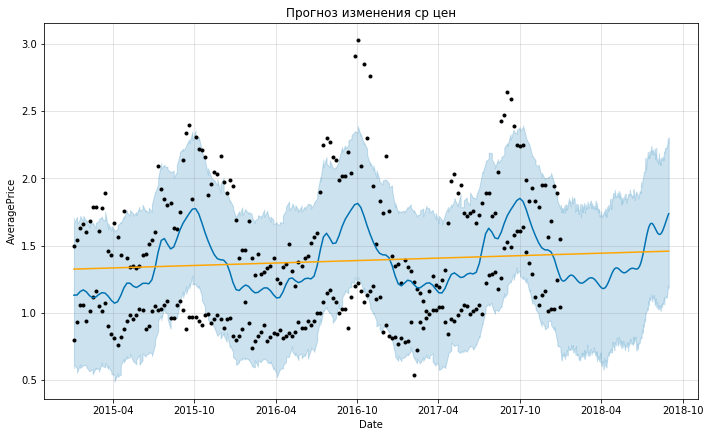

In [199]:
fig1 = m.plot(forecast)
plt.plot(forecast['ds'], forecast['trend'], color='orange')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.title('Прогноз изменения ср цен')

plt.show()
